In [3]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

In [4]:
# os.listdir('./face_age')

In [5]:
age_targets = ['001','002','003','004','005','006','007','008','009','010','011','012','013','014','015',
               '016','017','018','019','020','021','022','023','024','025','026','027','028','029','030',
               '031','032','033','034','035','036','037','038','039','040','041','042','043','044','045',
               '046','047','048','049','050','051','052','053','054','055','056','057','058','059','060',
               '061','062','063','064','065','066','067','068','069','070','071','072','073','074','075',
               '076','077','078','079','080','081','082','083','084','085','086','087','088','089','090',
               '091','092','093','095','096','099','100','101','110']

In [6]:
train_dir = './face_age'
data = []

for age_target in age_targets:
    age_lable = age_targets.index(age_target)
    age_path = os.path.join(train_dir,age_target)
    for img in os.listdir(age_path):
        img_path = os.path.join(age_path,img)
        train_img = plt.imread(img_path)
        try:
            image = cv2.resize(train_img,(100,100))
            np_image = np.array(image)
            data.append([np_image, age_lable])
        except Exception as e:
            pass
    
len(data)

9778

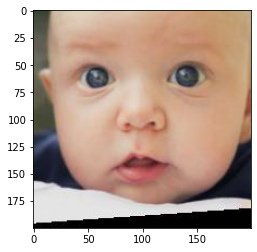

In [7]:
im = plt.imread('./face_age/001/16.png')
plt.imshow(im)

In [8]:
random.shuffle(data)

### train data has been shuffled before here 

In [9]:
features = []
labels =[]

for feature, label in data:
    features.append(feature)
    labels.append(label)

np_features = np.array(features)
np_lables = np.array(labels)

In [10]:
print(np_lables.shape,np_features.shape)

(9778,) (9778, 100, 100, 3)


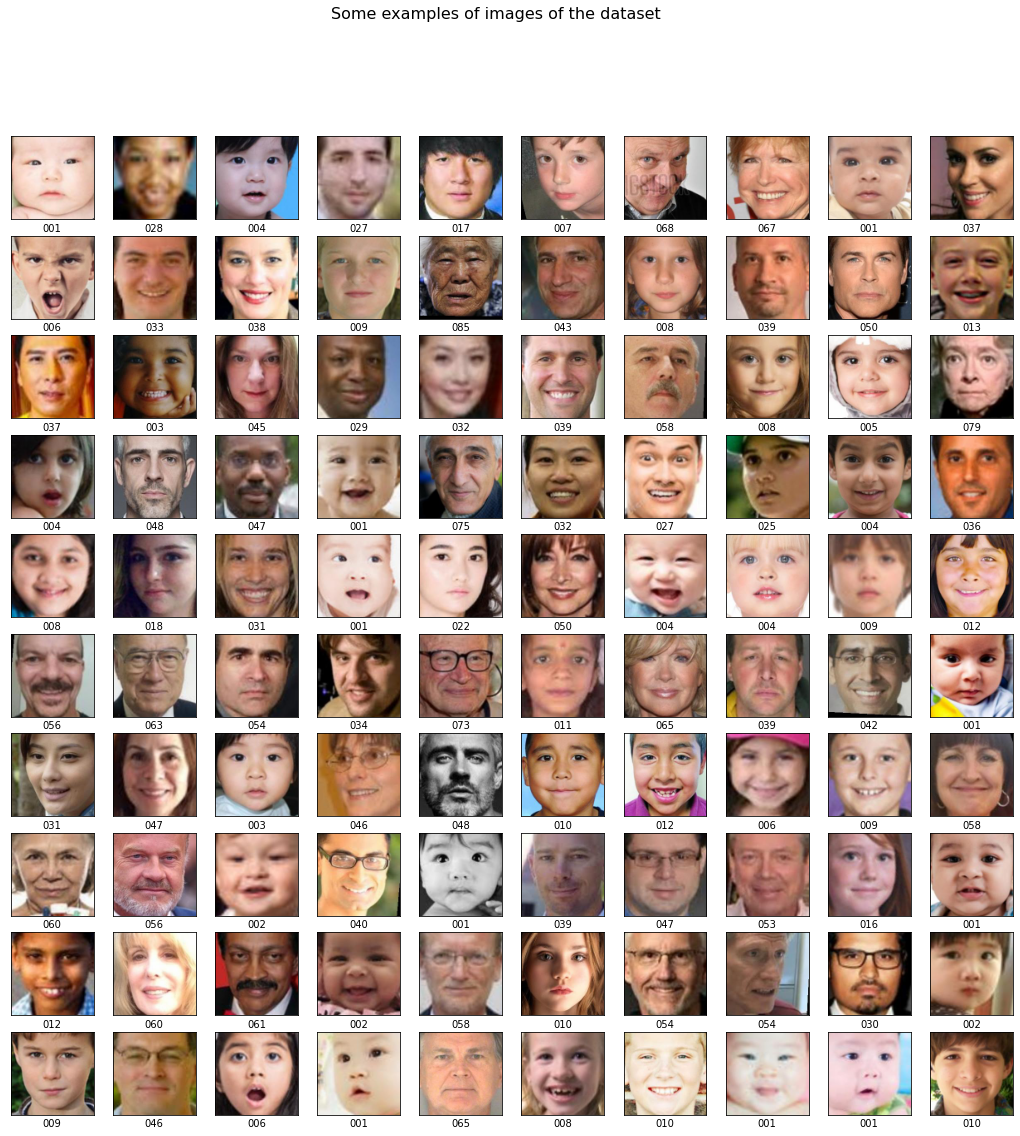

In [11]:
%matplotlib inline
fig = plt.figure(figsize=(18,18))
fig.suptitle("Some examples of images of the dataset", fontsize=16)
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np_features[i], cmap=plt.cm.binary)
    plt.xlabel(age_targets[np_lables[i]])
plt.show()

In [12]:
np_lables

array([ 0, 27,  3, ...,  2, 11, 83])

## generate Hog features for train data

In [13]:
from skimage.feature import hog

hog_images = []
hog_features = []
for image in np_features:
    fd,hog_image = hog(image, orientations=8, pixels_per_cell=(8,8),cells_per_block=(1,1),
                       block_norm= 'L2',visualize=True, multichannel=True)
    hog_images.append(hog_image)
    hog_features.append(fd)

In [14]:
np_hog_features = np.array(hog_features)
np_hog_images = np.array(hog_images)

In [15]:
print(np_hog_images.shape, np_hog_features.shape)

(9778, 100, 100) (9778, 1152)


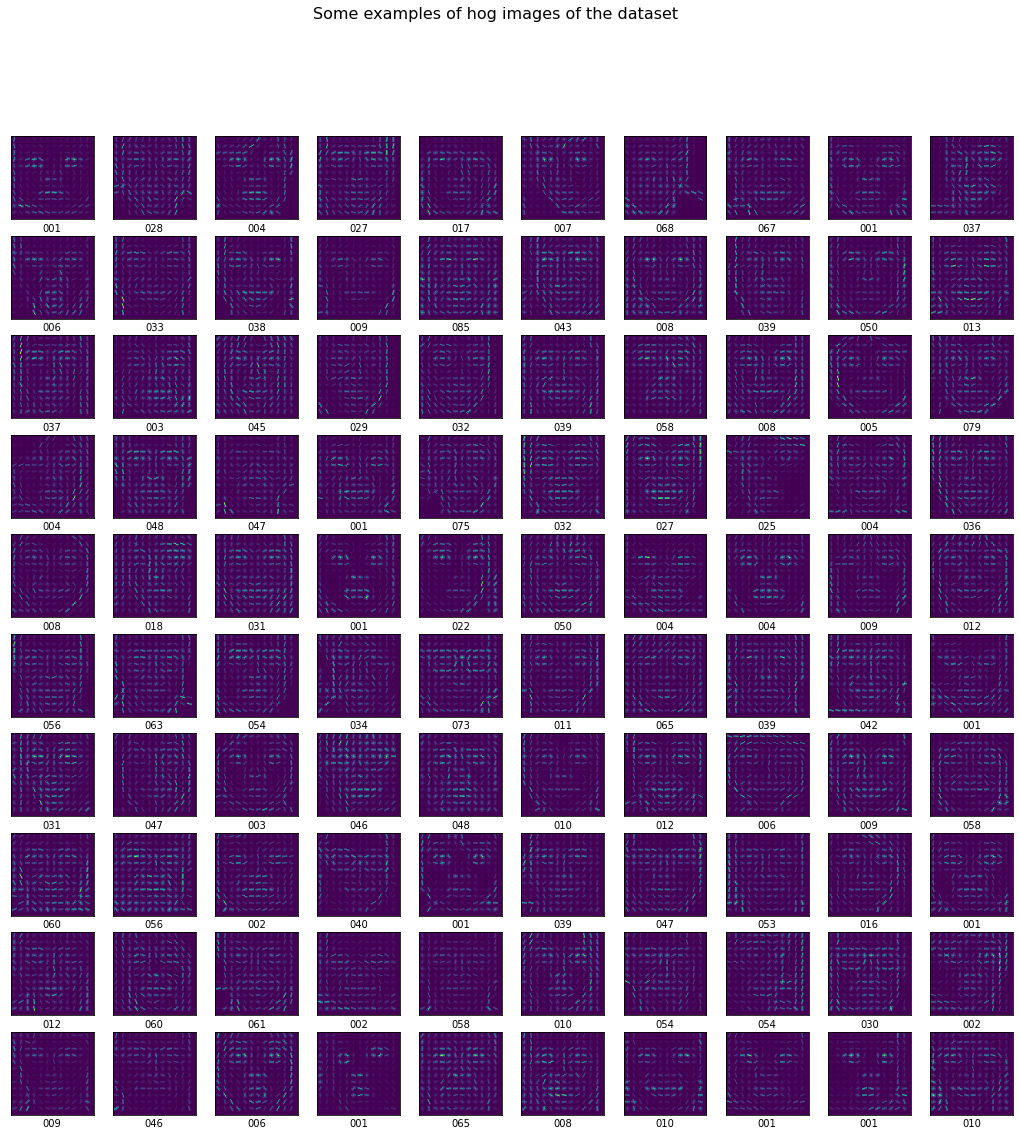

In [16]:
fig_hog = plt.figure(figsize=(18,18))
fig_hog.suptitle("Some examples of hog images of the dataset", fontsize=16)
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np_hog_images[i])
    plt.xlabel(age_targets[np_lables[i]])
plt.show()

In [17]:
from sklearn.decomposition import PCA
pca_90 = PCA(n_components=0.90,svd_solver='full')
np_hog_features_pca = pca_90.fit_transform(np_hog_features)
np_hog_features_pca.shape

(9778, 610)

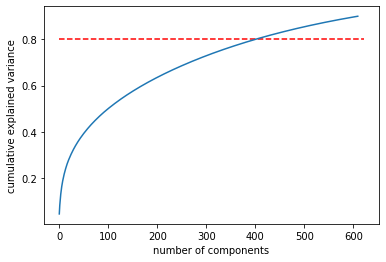

In [18]:
plt.plot(np.cumsum(pca_90.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.hlines([0.8], 0, 621, linestyles='dashed', colors='red')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np_hog_features, np_lables, test_size= 0.2)

In [20]:
from sklearn.svm import SVC
svc_model = SVC(C=3)

In [21]:
svc_model.fit(X_train, y_train)

SVC(C=3)

In [22]:
%%time
y_pred = svc_model.predict(X_test)

Wall time: 14.5 s


In [23]:
svc_model.score(X_test, y_test)

0.19529652351738241

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=4)

In [25]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [26]:
%%time
y_knn_pred = knn_model.predict(X_test)

Wall time: 401 ms


In [27]:
knn_model.score(X_test, y_test)

0.14212678936605316